## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sklearn
import math

from scipy.stats import shapiro
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler


from sklearn.model_selection import train_test_split

In [3]:
np.linspace(0.1, 1.0, 10, endpoint=True)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

## Exploratory data analysis

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


### Amount==0

In [7]:
df[(df.Amount==0)&(df.Class==1)].shape

(27, 31)

In [8]:
df.shape

(284807, 31)

In [9]:
df[~((df.Amount==0)&(df.Class==1))].shape

(284780, 31)

Here we will observe the distribution of our classes

In [10]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print('normal_share:',normal_share)
print('fraud_share:',fraud_share)

normal_share: 99.82725143693798
fraud_share: 0.1727485630620034


In [11]:
class_lst=['Non-Fraudulent', 'Fraudulent']
share_lst=[normal_share,fraud_share]
col_names=['Class','Percent']
df_percent=pd.DataFrame(data=list(zip(class_lst,share_lst)),columns=col_names)


normal_count=df[df.Class==0]['Class'].count()
fraud_count=df[df.Class==1]['Class'].count()
class_lst=['Non-Fraudulent', 'Fraudulent']
share_lst=[normal_count,fraud_count]
col_names=['Class','Count']

df_count=pd.DataFrame(data=list(zip(class_lst,share_lst)),columns=col_names)

In [12]:
df_percent

,Class,Percent
0,Non-Fraudulent,99.827251
1,Fraudulent,0.172749


In [13]:
df_count

,Class,Count
0,Non-Fraudulent,284315
1,Fraudulent,492


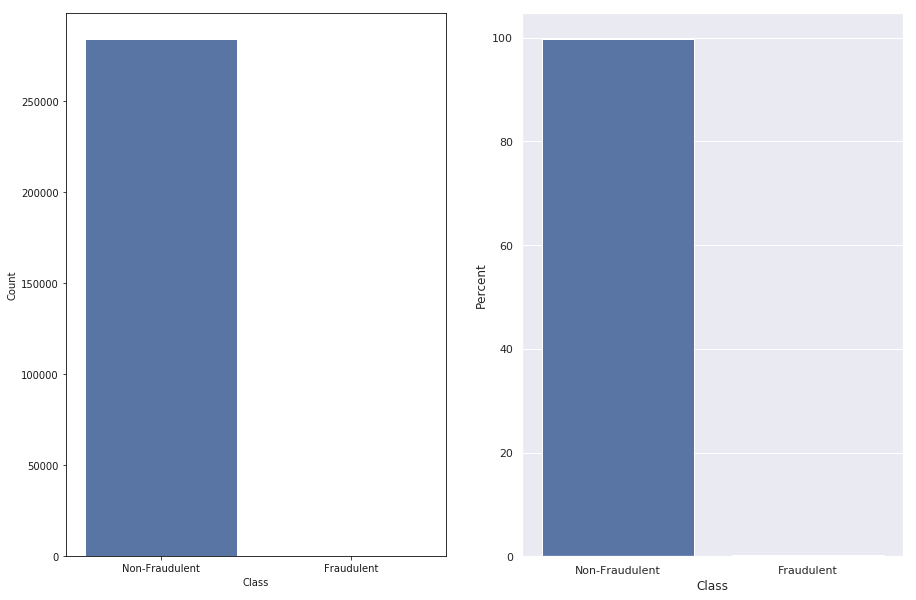

In [14]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
sns.set(style="darkgrid")
sns.barplot(x="Class",y='Count', data=df_count)

plt.subplot(1,2,2)
sns.set(style="darkgrid")
sns.barplot(x="Class",y='Percent', data=df_percent)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

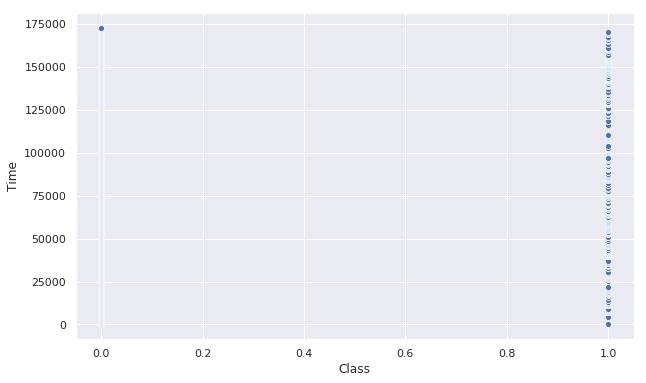

In [16]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(10,6))

sns.set(style="darkgrid")
sns.scatterplot(y = 'Time', x = 'Class', data = df)

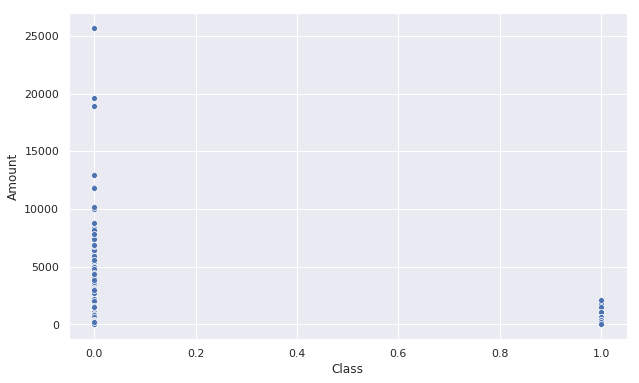

In [17]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(10,6))

sns.set(style="darkgrid")
sns.scatterplot(y = 'Amount', x = 'Class', data = df)

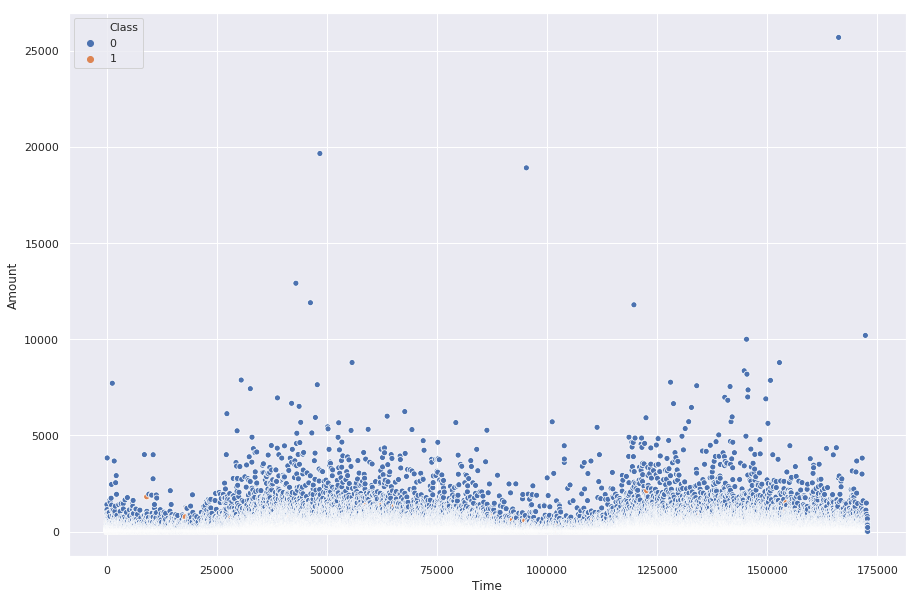

In [18]:
plt.figure(figsize=(15,10))

sns.set(style="darkgrid")
sns.scatterplot(y = 'Amount', x = 'Time',hue='Class', data = df)

In [19]:
# Drop unnecessary columns

#as the time provided is a relative column so its better to drop it
main_df=df.drop(['Time'],axis=1)

### Splitting the data into train & test data

In [20]:
y= main_df['Class']#class variable
X=main_df.drop(['Class'],axis=1)

In [21]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [22]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


### Plotting the distribution of a variable

In [23]:
# plot the histogram of a variable from the dataset to see the skewness

In [24]:
X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

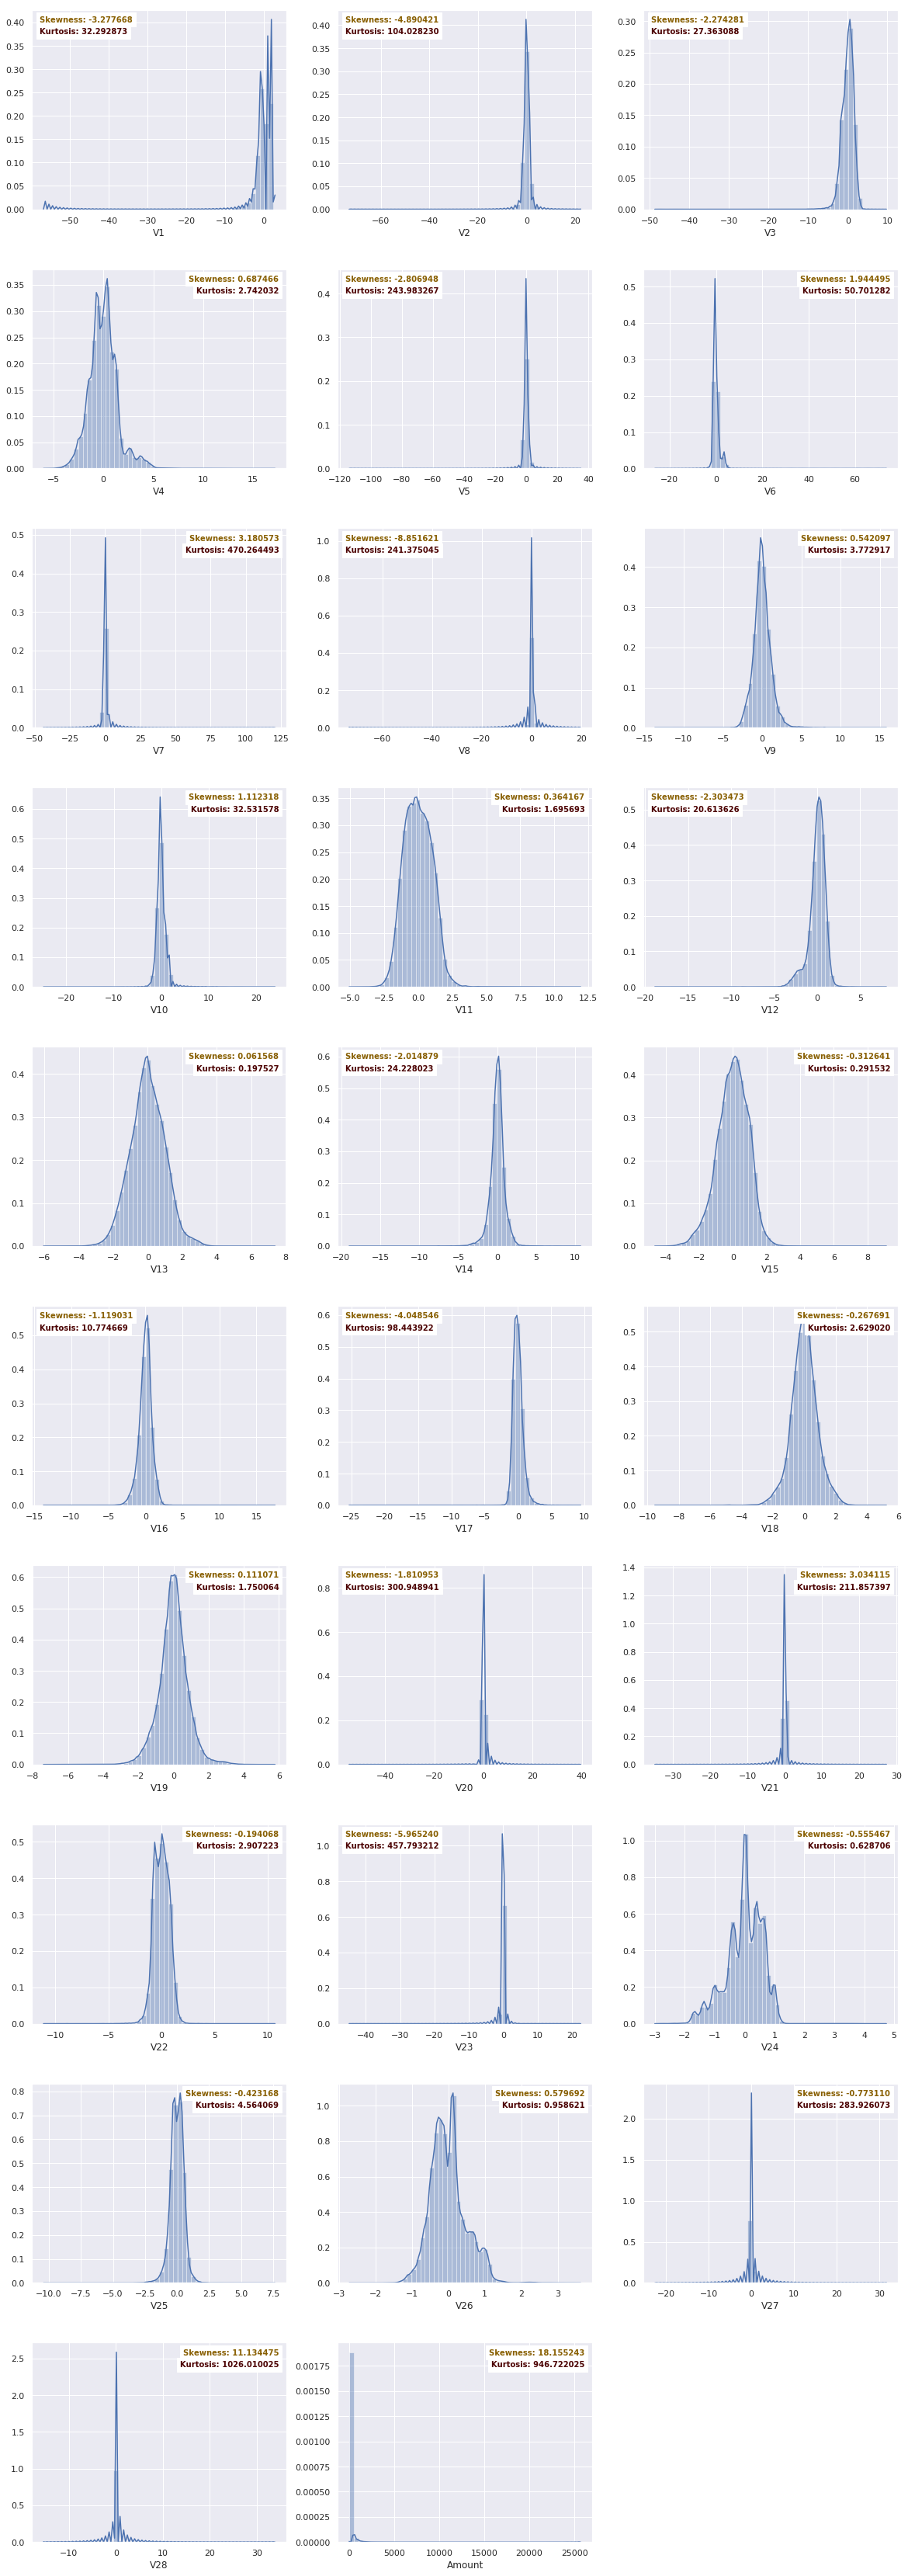

In [25]:
#inputs for subplot

only_vars=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

col_list=only_vars


#targetcol='Churn_Tag'
plot_df=X_train
numplots_eachrow=3
plot_data=plot_df[col_list]

# num plot calculations
numof_plots=[x+1 for x in range(0,len(col_list))]
col_rows=int(len(col_list)/numplots_eachrow)+1 if (len(col_list) % numplots_eachrow)!=0 else int(len(col_list)/numplots_eachrow)

#plot
plt.show()
ht=(len(numof_plots)%numplots_eachrow)+1
xfig=min(8*numplots_eachrow,15)
yfig=min(ht*8,15)

plt.figure(figsize=(20,60))
#f, axes = plt.subplots(col_rows,numplots_eachrow, sharex=True)

for i in numof_plots:
    numof_rows=col_rows
    numplots_echrow=numplots_eachrow
    subplot_num=i
    plt.subplot(numof_rows,numplots_echrow,subplot_num)
    g=sns.distplot(plot_df[col_list[i-1]])
    ax=g.axes
    check_val=plot_data.iloc[:,i-1].skew()

    if check_val<-1:
        ha='left'
        xval=0.03
    else:
        ha='right'
        xval=0.97

    stat, p = shapiro(plot_data.iloc[:,i-1])
    #print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.20
    if p > alpha:
          #print('Sample looks Gaussian (fail to reject H0)')
        gauss_var='Gaussian'
    else:
        #print('Sample does not look Gaussian (reject H0)')
        gauss_var='NOT Gaussian'

    ax.text(x=xval, y=0.97, transform=ax.transAxes, s="Skewness: %f" % plot_data.iloc[:,i-1].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=xval, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % plot_data.iloc[:,i-1].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
        backgroundcolor='white', color='xkcd:dried blood')
    # ax.text(x=xval, y=0.85, transform=ax.transAxes, s=gauss_var,\
    #     fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
    #     backgroundcolor='white', color='xkcd:poo brown')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [26]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

## Skewness Fix

In [27]:
pt = PowerTransformer(standardize=True,copy=False)
X_train_skew_df=pd.DataFrame(pt.fit_transform(X_train[col_list]))
X_train_skew_df.columns=col_list

In [28]:
# plot the histogram of a variable from the dataset again to see the result 

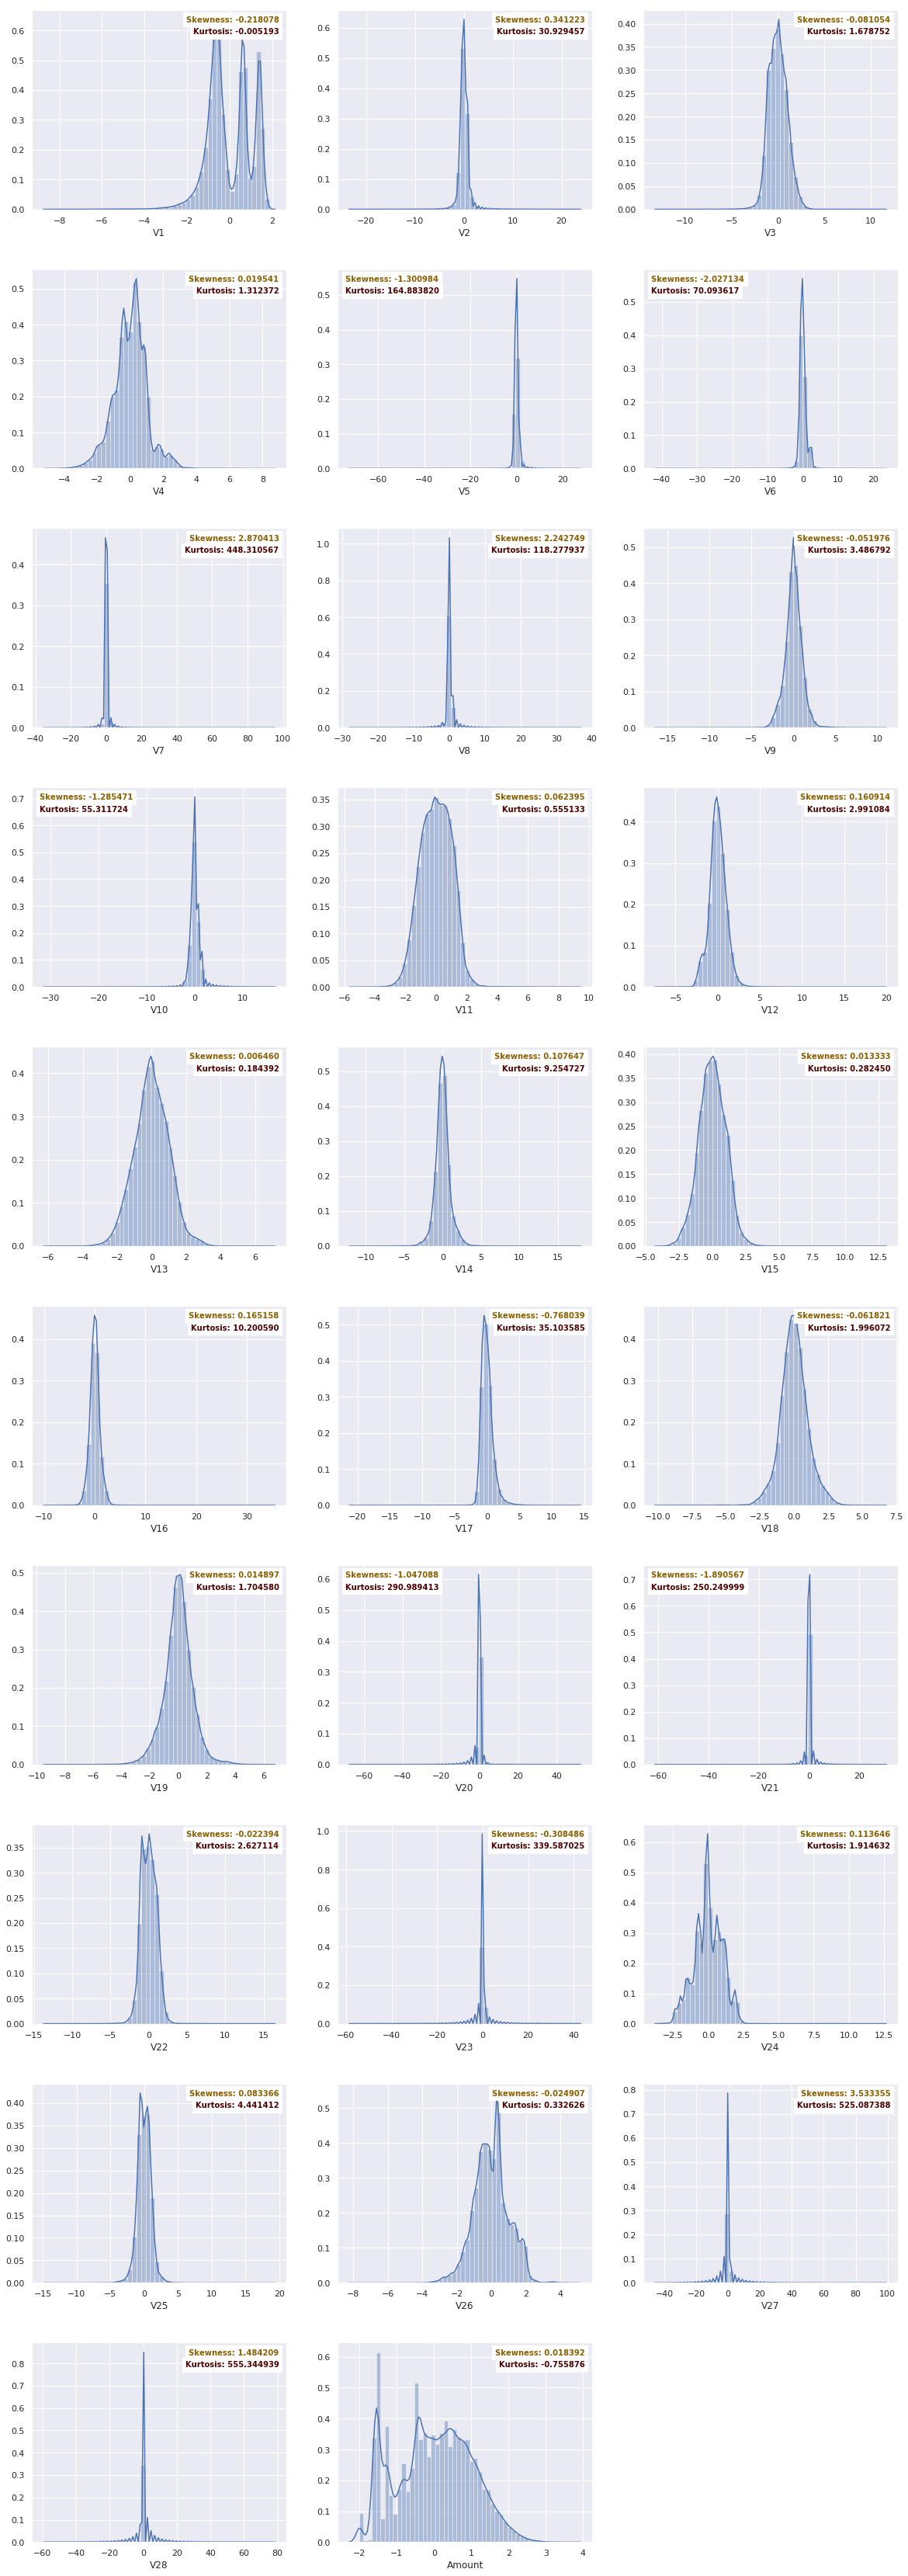

In [29]:
#inputs for subplot
col_list=only_vars
#targetcol='Churn_Tag'
plot_df=X_train_skew_df
numplots_eachrow=3
plot_data=plot_df[col_list]

# num plot calculations
numof_plots=[x+1 for x in range(0,len(col_list))]
col_rows=int(len(col_list)/numplots_eachrow)+1 if (len(col_list) % numplots_eachrow)!=0 else int(len(col_list)/numplots_eachrow)

#plot
plt.show()
ht=(len(numof_plots)%numplots_eachrow)+1
xfig=min(8*numplots_eachrow,15)
yfig=min(ht*8,15)

plt.figure(figsize=(20,60))
#f, axes = plt.subplots(col_rows,numplots_eachrow, sharex=True)

for i in numof_plots:
    numof_rows=col_rows
    numplots_echrow=numplots_eachrow
    subplot_num=i
    plt.subplot(numof_rows,numplots_echrow,subplot_num)
    g=sns.distplot(plot_df[col_list[i-1]])
    ax=g.axes
    check_val=plot_data.iloc[:,i-1].skew()

    if check_val<-1:
        ha='left'
        xval=0.03
    else:
        ha='right'
        xval=0.97

    stat, p = shapiro(plot_data.iloc[:,i-1])
    #print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.20
    if p > alpha:
        #print('Sample looks Gaussian (fail to reject H0)')
        gauss_var='Gaussian'
    else:
        #print('Sample does not look Gaussian (reject H0)')
        gauss_var='NOT Gaussian'

    ax.text(x=xval, y=0.97, transform=ax.transAxes, s="Skewness: %f" % plot_data.iloc[:,i-1].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=xval, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % plot_data.iloc[:,i-1].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
        backgroundcolor='white', color='xkcd:dried blood')
    # ax.text(x=xval, y=0.85, transform=ax.transAxes, s=gauss_var,\
    #     fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment=ha,\
    #     backgroundcolor='white', color='xkcd:poo brown')
    

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

## Test dataset Transform

In [30]:
X_test_skew_df=pd.DataFrame(pt.transform(X_test[col_list]))
X_test_skew_df.columns=col_list

<br>

## Balancing scenarios

### Model building with balancing Classes

##### Perform class balancing with :
- With Skew Treatment and Without Balancing
- With Skew Treatment and Balancing Via Random Over sampelling
- With Balancing Via ADASYN
- `With Balancing Via SMOTE`

### With Balancing Via ADASYN

In [31]:
#importing
import imblearn
from imblearn.over_sampling import ADASYN

Using TensorFlow backend.


In [32]:
#initiation
ada=ADASYN(sampling_strategy='minority',random_state=100)
from imblearn import over_sampling
#ada = over_sampling.ADASYN(random_state=100)

In [33]:
#fit_resample
X_DS2_train_2,y_DS2_train_2=ada.fit_resample(X_train_skew_df,y_train)
y_DS2_train=pd.Series(y_DS2_train_2)
X_DS2_train=pd.DataFrame(X_DS2_train_2,columns=col_list)

In [34]:
print(X_DS2_train.shape)
print(y_DS2_train.shape)

(454895, 29)
(454895,)


In [35]:
classes=y_DS2_train.value_counts()
normal_share=classes[0]/y_DS2_train.count()*100
fraud_share=classes[1]/y_DS2_train.count()*100

print('Normal:',normal_share)
print('Fraud:',fraud_share)

Normal: 50.000329746424995
Fraud: 49.999670253575005


### Print the class distribution after applying ADASYN

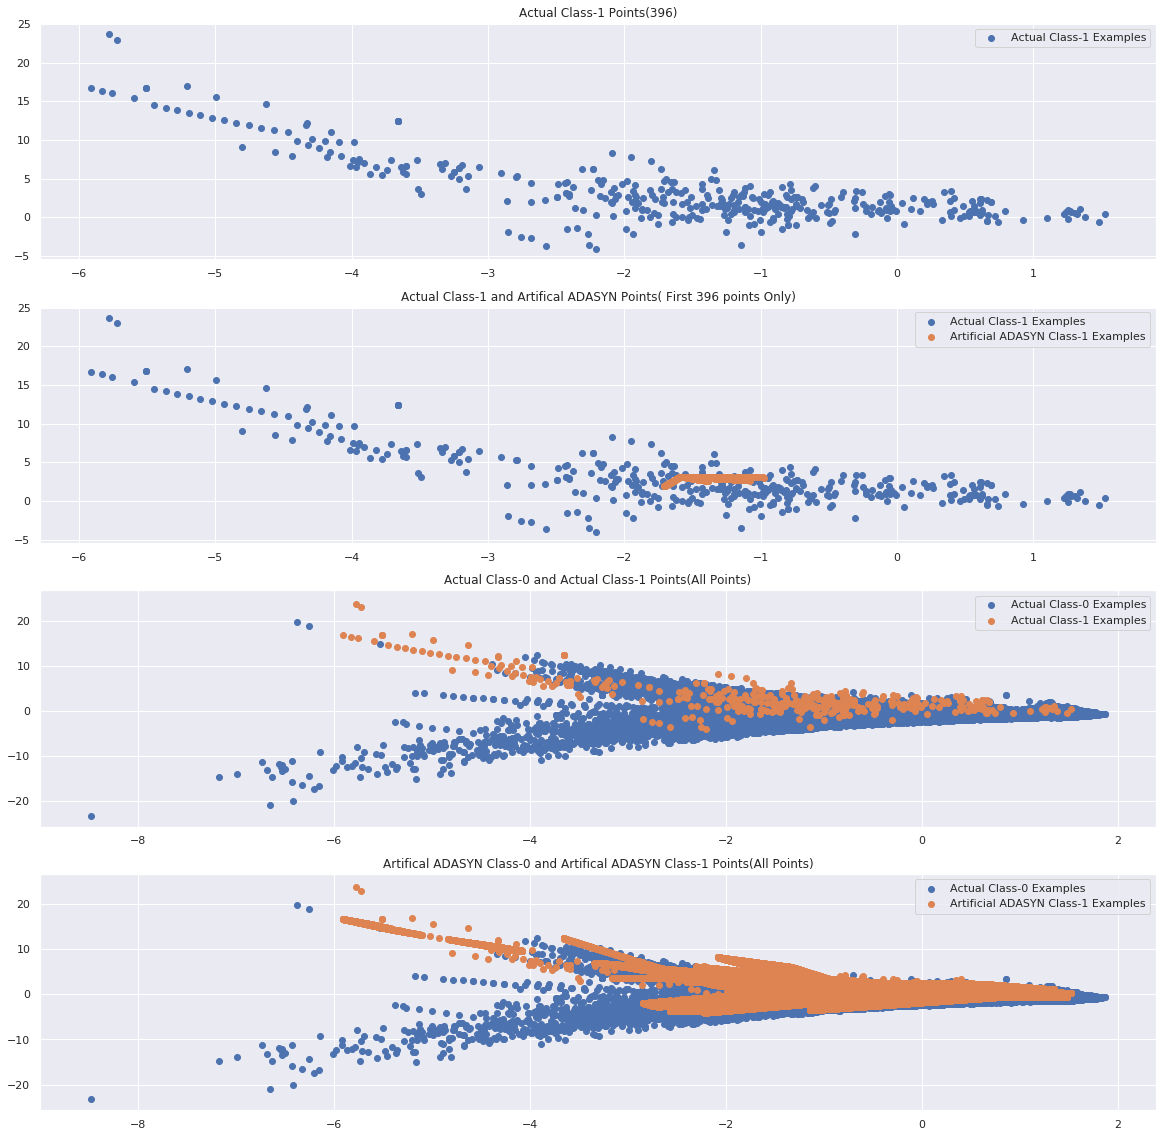

In [36]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

#ada = over_sampling.ADASYN(random_state=0)
#X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train_skew_df, y_train)

# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_DS2_train[X_train_skew_df.shape[0]:]

X_train_1 = X_train_skew_df.values[np.where(y_train==1.0)]
X_train_0 = X_train_skew_df.values[np.where(y_train==0.0)]

X_train_ada_1 = X_DS2_train.values[np.where(y_DS2_train==1.0)]
X_train_ada_0 = X_DS2_train.values[np.where(y_DS2_train==0.0)]

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(4, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.title('Actual Class-1 Points(396)')
plt.legend()

plt.subplot(4, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.values[:X_train_1.shape[0], 0], X_train_adasyn_1.values[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.title('Actual Class-1 and Artifical ADASYN Points( First 396 points Only)')
plt.legend()

plt.subplot(4, 1, 3)
plt.scatter(X_train_0[:, 0], X_train_0[:, 1], label='Actual Class-0 Examples')
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.title('Actual Class-0 and Actual Class-1 Points(All Points)')
plt.legend()


plt.subplot(4, 1, 4)
#plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_ada_0[:, 0], X_train_ada_0[:, 1], label='Actual Class-0 Examples')
plt.scatter(X_train_ada_1[:, 0], X_train_ada_1[:, 1],
            label='Artificial ADASYN Class-1 Examples')
plt.title('Artifical ADASYN Class-0 and Artifical ADASYN Class-1 Points(All Points)')
plt.legend()

### With Balancing Via SMOTE

In [37]:
#importing
from imblearn.over_sampling import SMOTE

In [38]:
#initiation
smote=SMOTE(sampling_strategy='minority',random_state=100)

In [39]:
#fit_resample
X_DS3_train_3,y_DS3_train_3=smote.fit_resample(X_train_skew_df,y_train)
y_DS3_train=pd.Series(y_DS3_train_3)
X_DS3_train=pd.DataFrame(X_DS3_train_3,columns=col_list)

In [40]:
print(X_DS3_train.shape)
print(y_DS3_train.shape)

(454898, 29)
(454898,)


In [41]:
classes=y_DS3_train.value_counts()
normal_share=classes[0]/y_DS3_train.count()*100
fraud_share=classes[1]/y_DS3_train.count()*100

print('Normal:',normal_share)
print('Fraud:',fraud_share)

Normal: 50.0
Fraud: 50.0


### Print the class distribution after applying SMOTE 

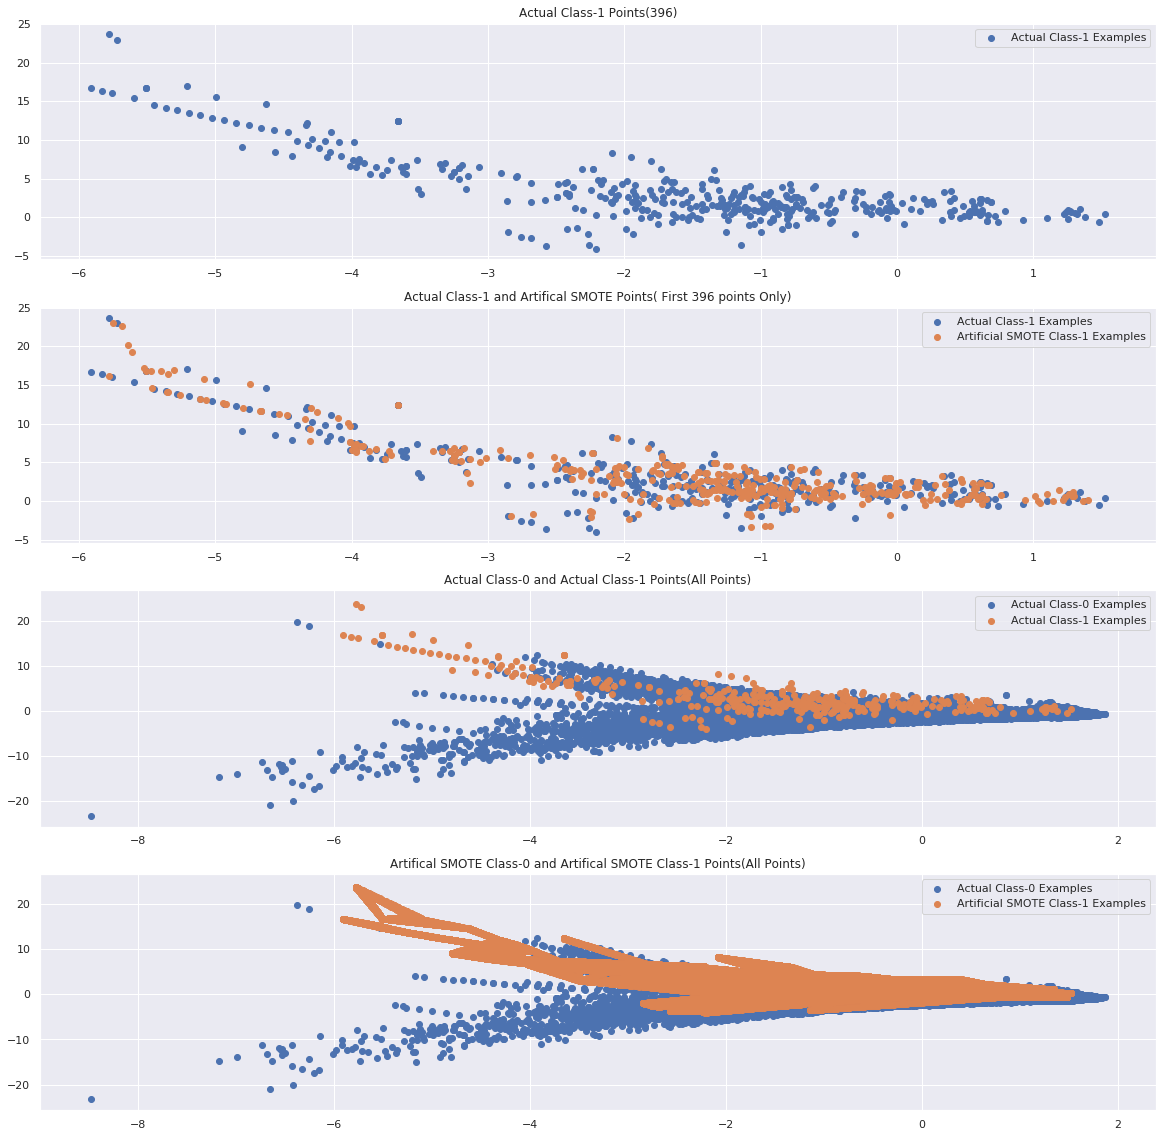

In [42]:


import warnings
warnings.filterwarnings("ignore")
from imblearn import over_sampling


#sm = over_sampling.SMOTE(random_state=0)
#X_train_smote, y_train_smote = sm.fit_resample(X_train_skew_df, y_train)

# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do

X_train_smote_1 = X_DS3_train[X_train_skew_df.shape[0]:]

X_train_1 = X_train_skew_df.values[np.where(y_train==1.0)]
X_train_0 = X_train_skew_df.values[np.where(y_train==0.0)]

X_train_sm_1 = X_DS3_train.values[np.where(y_DS3_train==1.0)]
X_train_sm_0 = X_DS3_train.values[np.where(y_DS3_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(4, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.title('Actual Class-1 Points(396)')
plt.legend()

plt.subplot(4, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.values[:X_train_1.shape[0], 0], X_train_smote_1.values[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.title('Actual Class-1 and Artifical SMOTE Points( First 396 points Only)')
plt.legend()

plt.subplot(4, 1, 3)
plt.scatter(X_train_0[:, 0], X_train_0[:, 1], label='Actual Class-0 Examples')
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.title('Actual Class-0 and Actual Class-1 Points(All Points)')
plt.legend()

plt.subplot(4, 1, 4)
#plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_sm_0[:, 0], X_train_sm_0[:, 1], label='Actual Class-0 Examples')
plt.scatter(X_train_sm_1[:, 0], X_train_sm_1[:, 1],
            label='Artificial SMOTE Class-1 Examples')
plt.title('Artifical SMOTE Class-0 and Artifical SMOTE Class-1 Points(All Points)')
plt.legend()

## ADASYN vs SMOTE

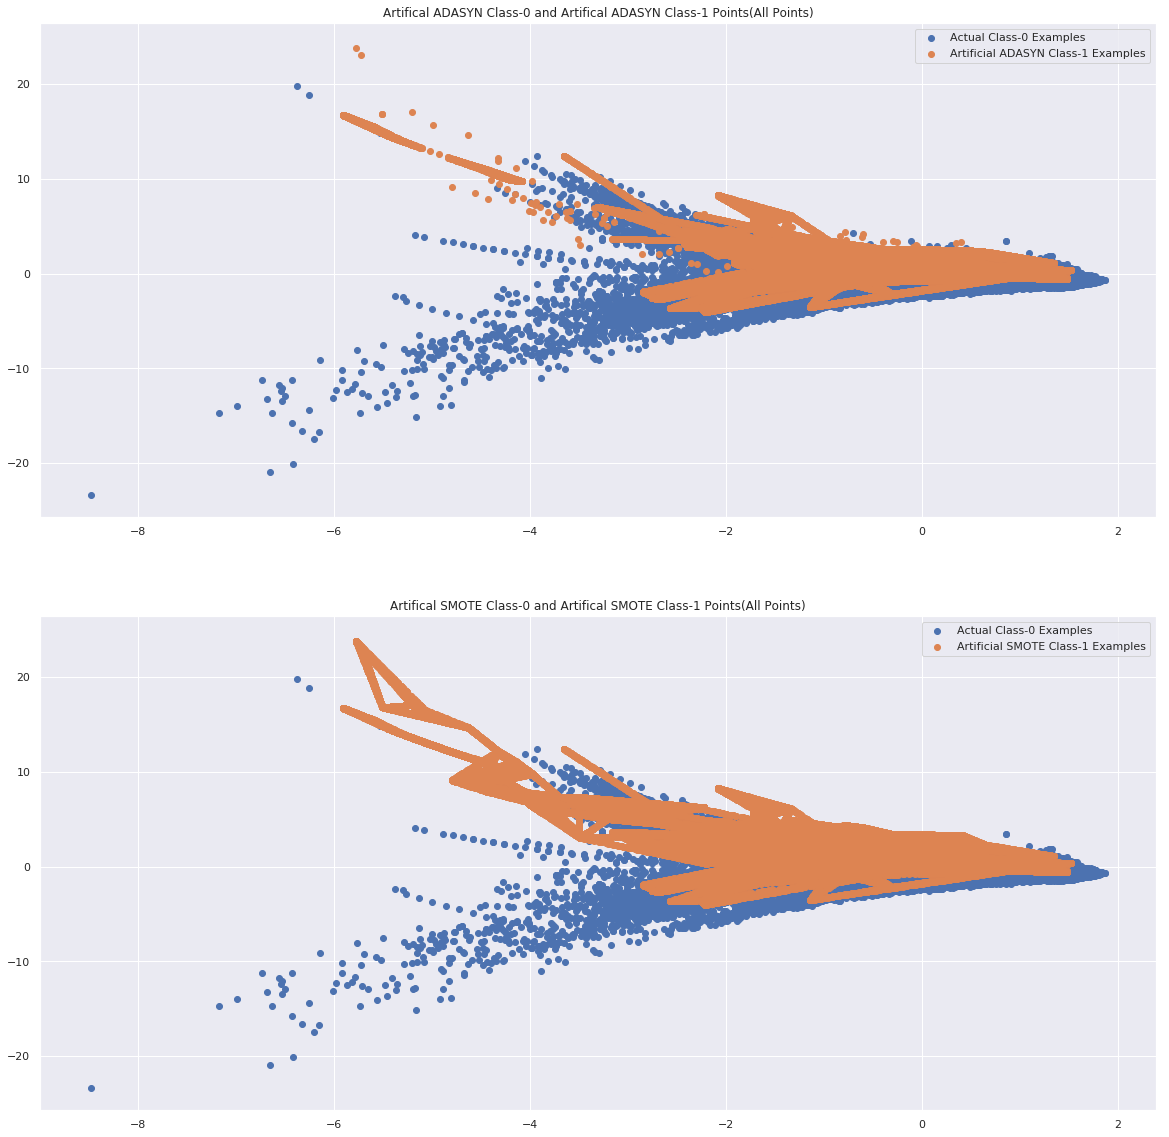

In [43]:
plt.subplot(2, 1, 1)
#plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_ada_0[:, 0], X_train_ada_0[:, 1], label='Actual Class-0 Examples')
plt.scatter(X_train_ada_1[:, 0], X_train_ada_1[:, 1],
            label='Artificial ADASYN Class-1 Examples')
plt.title('Artifical ADASYN Class-0 and Artifical ADASYN Class-1 Points(All Points)')
plt.legend()

plt.subplot(2, 1, 2)
#plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_sm_0[:, 0], X_train_sm_0[:, 1], label='Actual Class-0 Examples')
plt.scatter(X_train_sm_1[:, 0], X_train_sm_1[:, 1],
            label='Artificial SMOTE Class-1 Examples')
plt.title('Artifical SMOTE Class-0 and Artifical SMOTE Class-1 Points(All Points)')
plt.legend()

## Summary

In [44]:
print("With Skew and Balanced Via ADASYN :(X_DS2_train,y_DS2_train)")
print(X_DS2_train.shape)
print(y_DS2_train.shape)

classes=y_DS2_train.value_counts()
normal_share=classes[0]/y_DS2_train.count()*100
fraud_share=classes[1]/y_DS2_train.count()*100

print('Ration(Fraud:Normal):',fraud_share,":",normal_share)
print('')

print("With Skew and Balanced Via SMOTE :(X_DS3_train,y_DS3_train)")
print(X_DS3_train.shape)
print(y_DS3_train.shape)

classes=y_DS3_train.value_counts()
normal_share=classes[0]/y_DS3_train.count()*100
fraud_share=classes[1]/y_DS3_train.count()*100

print('Ration(Fraud:Normal):',fraud_share,":",normal_share)
print('')


With Skew and Balanced Via ADASYN :(X_DS2_train,y_DS2_train)
(454895, 29)
(454895,)
Ration(Fraud:Normal): 49.999670253575005 : 50.000329746424995

With Skew and Balanced Via SMOTE :(X_DS3_train,y_DS3_train)
(454898, 29)
(454898,)
Ration(Fraud:Normal): 50.0 : 50.0



# Model Building
- Build different models on the imbalanced dataset and see the result

### Tabel Summary

In [45]:
#model summary dataframe
Model_Name=[]
Thresold=[]
Train_ROC_score=[]
Test_ROC_score=[]
Total_Savings=[]

TP=[]
FP=[]
TN=[]
FN=[]
    
col_nams1=['Model_Name','Thresold','Train_ROC_score','Test_ROC_score','Total_Savings','TP','FP','TN','FN']

#dataframe-1
df_Model_Summary=pd.DataFrame(list(zip(Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,
                             TP,FP,TN,FN)),
                         columns=col_nams1)

#dataframe-1
def add_new_row(val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,val_9,dataframe=df_Model_Summary):
    Model_Name=[str(val_1)]
    Thresold=[str(val_2)]
    Train_ROC_score=[str(val_3)]
    Test_ROC_score=[str(val_4)]
    Total_Savings=[str(val_5)]
    
    TP=[str(val_6)]
    FP=[str(val_7)]
    TN=[str(val_8)]
    FN=[str(val_9)]
    
    df=dataframe
    df=df.drop_duplicates()
    insert_at=df.shape[0]
    df.loc[insert_at]=Model_Name+Thresold+Train_ROC_score+Test_ROC_score+Total_Savings+TP+FP+TN+FN
    df=df.drop_duplicates()
    return(df)

df_Model_Summary

,Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,TP,FP,TN,FN


### Using hyperopt Tuning

In [46]:
# !pip install hyperopt

In [47]:
#import
from hyperopt import fmin,tpe,hp,STATUS_OK,Trials

### Stratifed Kfold

In [48]:
#import
from sklearn.model_selection import StratifiedKFold

In [49]:
#initiate
skfold=StratifiedKFold(n_splits=5,shuffle=False,random_state=100)

### ROC Curve

In [50]:
#ROC function
from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    #return fpr, tpr, thresholds

## Randon Forest

### Hyperopt Tuning

In [51]:
%%time

X_trn=X_DS3_train
y_trn=y_DS3_train

X_tst=X_test_skew_df
y_tst=y_test

#defining
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
def hyperopt_train_test(params):
    clf=RandomForestClassifier(**params)
    crossvalscore=cross_val_score(clf,X_trn,y_trn,n_jobs=-1,cv=5,
              scoring= 'roc_auc').mean()
    return(crossvalscore)

rf_space={
    'max_depth':hp.choice('max_depth',range(8,16)),
    'max_features':hp.choice('max_features',range(1,15)),
    'criterion': hp.choice('criterion', ["gini", "entropy"]),
    'n_estimators': hp.choice('n_estimators', range(50,160,10)),
    'min_samples_split':hp.uniform('min_samples_split', 0, 1)
    
}

rf_best=0

def f(params):
    global rf_best
    acc=hyperopt_train_test(params)
    if acc>rf_best:
        rf_best=acc
        print('new best:', rf_best, params)
    return {'loss': -acc, 'status': STATUS_OK}

rf_trials=Trials()
rf_best=fmin(f,rf_space,algo=tpe.suggest,max_evals=30,trials=rf_trials)


from hyperopt import space_eval
rf_best_params=space_eval(rf_space, rf_best)
print('Best:',rf_best_params)

new best:                                             
0.9502153824880942                                    
{'criterion': 'entropy', 'max_depth': 11, 'max_features': 5, 'min_samples_split': 0.4242402084266127, 'n_estimators': 80}
new best:                                                                        
0.984167854747278                                                                
{'criterion': 'gini', 'max_depth': 14, 'max_features': 10, 'min_samples_split': 0.18054055433774852, 'n_estimators': 90}
new best:                                                                          
0.9875591558111866                                                                
{'criterion': 'gini', 'max_depth': 14, 'max_features': 5, 'min_samples_split': 0.08091425297763721, 'n_estimators': 120}
new best:                                                                            
0.9894639971583168                                                                 
{'criterion': 'gini', 'ma

### Best Parameters

In [52]:
# rf_best_params={'criterion': 'entropy', 'max_depth': 10,
#                 'max_features': 12, 'min_samples_split': 0.041454835625729824, 
#                 'n_estimators': 90}

In [52]:
rf_best_params

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 14,
 'min_samples_split': 0.0013691516085162733,
 'n_estimators': 70}

### CV Score

In [53]:
%%time

X_trn=X_DS3_train
y_trn=y_DS3_train

X_tst=X_test_skew_df
y_tst=y_test


from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#initiate
skfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=100)
rf_clf=RandomForestClassifier(**rf_best_params)

rf_crossvalscore=cross_val_score(rf_clf,X_trn,y_trn,n_jobs=-1,cv=skfold,
            scoring= 'roc_auc')

CPU times: user 185 ms, sys: 213 ms, total: 398 ms
Wall time: 12min 21s


In [54]:
rf_crossvalscore

array([0.99906216, 0.99881112, 0.9986627 , 0.99908045, 0.99886582])

### Final Fit

In [55]:
%%time
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(**rf_best_params)

CPU times: user 40 µs, sys: 10 µs, total: 50 µs
Wall time: 54.1 µs


In [56]:
%%time
rf_clf.fit(X_trn,y_trn)

CPU times: user 6min 30s, sys: 6.03 ms, total: 6min 30s
Wall time: 6min 30s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features=14,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1,
                       min_samples_split=0.0013691516085162733,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
%%time
y_pred_trn_rf_lst = rf_clf.predict_proba(X_trn)
y_pred_trn_rf=[x[1] for x in y_pred_trn_rf_lst]

CPU times: user 2.62 s, sys: 28.1 ms, total: 2.65 s
Wall time: 2.65 s


In [58]:
#declaring
y_t=y_trn
y_p=y_pred_trn_rf

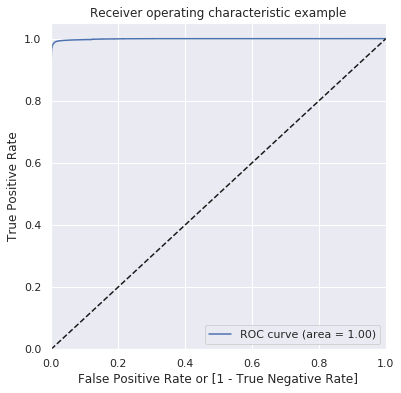

In [59]:
draw_roc( y_t, y_p )

In [60]:
Train_AUC=metrics.roc_auc_score(y_t,y_p)
print('Train auc =', metrics.roc_auc_score(y_t,y_p))
fpr, tpr, thresholds = metrics.roc_curve(y_t,y_p)
threshold = thresholds[np.argmax(tpr-fpr)]
print('Best Threshold=%f'%threshold)

train_threshold=threshold

Train auc = 0.9990512704687622
Best Threshold=0.377220


### Evaluation on Test Set

In [61]:
%%time
y_pred_tst_rf_lst = rf_clf.predict_proba(X_tst)
y_pred_tst_rf=[x[1] for x in y_pred_tst_rf_lst]

CPU times: user 320 ms, sys: 242 µs, total: 320 ms
Wall time: 318 ms


### ROC Curve

In [62]:
#declaring
y_t=y_tst
y_p=y_pred_tst_rf

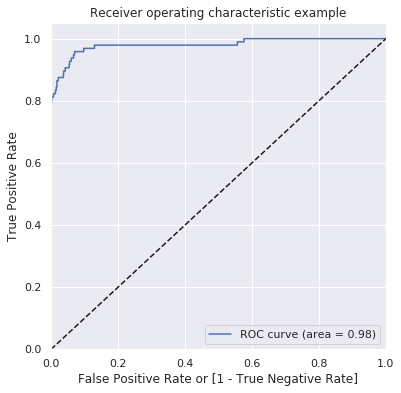

In [63]:
draw_roc( y_t, y_p )

In [64]:
from sklearn.metrics import roc_curve
from numpy import argmax
Test_AUC=metrics.roc_auc_score(y_t,y_p)
print('Test auc =', metrics.roc_auc_score(y_t,y_p))

Test auc = 0.9803098878650395


In [65]:

#creating new dataframe with predections and actual values
CFM_final = pd.DataFrame({'Actual':y_test, 'Predict_Prob':y_p})
CFM_final['Predict_Prob'] = y_p
CFM_final['Amount']=X_test['Amount']
CFM_final['Amount_Cost_Coeff']=0
CFM_final['Call_Cost_Coeff']=0


prob_i=round(train_threshold,4)
print('Thresold:-',prob_i)

CFM_final['Predicted'] = CFM_final.Predict_Prob.map(lambda x: 1 if x > prob_i else 0)
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=-1
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=1

CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=-10
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=-10

CFM_final['Amount_cal']=CFM_final['Amount_Cost_Coeff']*CFM_final['Amount']

Amount_ontransac=sum(list(CFM_final['Amount_cal']))
Amount_oncalls=sum(list(CFM_final['Call_Cost_Coeff']))
Total_amount_saved=(Amount_ontransac+Amount_oncalls)

#print(Amount_ontransac)
#print(Amount_oncalls)
print(Total_amount_saved)
CFM_final.head()

Thresold:- 0.3772
988.5899999999965


,Actual,Predict_Prob,Amount,Amount_Cost_Coeff,Call_Cost_Coeff,Predicted,Amount_cal
49089,0,0.018264,1.99,0,0,0,0.0
154704,0,0.046087,6.99,0,0,0,0.0
67247,0,0.008747,306.16,0,0,0,0.0
251657,0,0.012960,0.99,0,0,0,0.0
201903,0,0.456775,30.27,0,-10,1,0.0


In [66]:
#metrics
confusion_rfelog=metrics.confusion_matrix(CFM_final.Actual, CFM_final.Predicted )
TP = confusion_rfelog[1,1] # true positive 
TN = confusion_rfelog[0,0] # true negatives
FP = confusion_rfelog[0,1] # false positives
FN = confusion_rfelog[1,0] # false negatives

print('TP:',TP)
print('TN:',TN)
print('FP:',FP)
print('FN:',FN)

TP: 79
TN: 56189
FP: 677
FN: 17


### Classification Report

In [67]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

print(confusion_matrix(CFM_final.Actual, CFM_final.Predicted))
print('\n')

print(classification_report(CFM_final.Actual, CFM_final.Predicted))

[[56189   677]
 [   17    79]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.10      0.82      0.19        96

    accuracy                           0.99     56962
   macro avg       0.55      0.91      0.59     56962
weighted avg       1.00      0.99      0.99     56962



### Summary

In [68]:
#template
Model_Name='Random Forest'
Thresold=round(train_threshold,4)
Train_ROC_score=round(Train_AUC,4)
Test_ROC_score=round(Test_AUC,4)
Total_Savings=round(Total_amount_saved,2)

TP=TP
FP=FP
TN=TN
FN=FN


df_Model_Summary=add_new_row(Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,
                             TP,FP,TN,FN,df_Model_Summary)
df_Model_Summary

,Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,TP,FP,TN,FN
0,Random Forest,0.3772,0.9991,0.9803,988.59,79,677,56189,17


## XGBoost

### Hyperopt Tuning

In [69]:
%%time

X_trn=X_DS3_train
y_trn=y_DS3_train

X_tst=X_test_skew_df
y_tst=y_test


#import
from hyperopt import fmin,tpe,hp,STATUS_OK,Trials

#defining
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import xgboost as xgb

xgb_space = {
    'booster '    : 'gbtree',       
    'objective'   : 'binary:logistic',
    'eval_metric' : 'auc',
    'max_depth' : hp.choice('max_depth', range(5, 20, 1)),
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
    'n_estimators' : hp.choice('n_estimators', range(200, 2100, 100)),
    'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01),
    'reg_lambda' : hp.uniform ('reg_lambda', 0,1)
    }

xgb_train = xgb.DMatrix(X_trn.values, y_trn.values)
xgb_eval  = xgb.DMatrix(X_tst.values, y_tst.values)

def hyperopt_train_test(params):

    train_=xgb_train

    xgb_clf = xgb.cv(params,
                   train_,
                   nfold=5,
                   num_boost_round=2000,
                   early_stopping_rounds=20,
                   verbose_eval=False,
                   shuffle=True,
                   stratified=True)

    crossvalscore=list(xgb_clf['test-auc-mean'])[-1]
    return(crossvalscore)


xgb_best=0


def f(params):
    global xgb_best
    acc=hyperopt_train_test(params)
    if acc>xgb_best:
        xgb_best=acc
        print('new best:', xgb_best, params)
    return {'loss': -acc, 'status': STATUS_OK}

xgb_trials=Trials()
xgb_best=fmin(f,xgb_space,algo=tpe.suggest,max_evals=50,trials=xgb_trials)



from hyperopt import space_eval

xgb_best_params=space_eval(xgb_space, xgb_best)
print('Best:',space_eval(xgb_space, xgb_best))

new best:                                             
0.9999904000000001                                    
{'booster ': 'gbtree', 'colsample_bytree': 0.25, 'eval_metric': 'auc', 'gamma': 0.33, 'learning_rate': 0.48, 'max_depth': 11, 'min_child_weight': 9.0, 'n_estimators': 1700, 'objective': 'binary:logistic', 'reg_lambda': 0.26971816300190454, 'subsample': 0.78}
new best:                                                                           
0.9999916000000001                                                                  
{'booster ': 'gbtree', 'colsample_bytree': 0.7000000000000001, 'eval_metric': 'auc', 'gamma': 0.21, 'learning_rate': 0.2, 'max_depth': 15, 'min_child_weight': 6.0, 'n_estimators': 1600, 'objective': 'binary:logistic', 'reg_lambda': 0.6193687394830611, 'subsample': 0.91}
new best:                                                                              
0.9999930000000001                                                                     
{'booster ': '

### Best Parameters

In [70]:
# xgb_best_params={'booster': 'gbtree', 'colsample_bytree': 0.84,
#             'eval_metric': 'auc', 'gamma': 0.13, 
#             'learning_rate': 0.07, 'max_depth': 19,
#             'min_child_weight': 5.0, 'n_estimators': 1500,
#             'objective': 'binary:logistic', 'reg_lambda': 0.001, 'subsample': 0.47}

In [71]:
xgb_best_params

{'booster ': 'gbtree',
 'colsample_bytree': 0.62,
 'eval_metric': 'auc',
 'gamma': 0.23,
 'learning_rate': 0.3,
 'max_depth': 9,
 'min_child_weight': 2.0,
 'n_estimators': 1400,
 'objective': 'binary:logistic',
 'reg_lambda': 0.41629553085508014,
 'subsample': 0.99}

In [ ]:
xgb_best_params2={'booster ': 'gbtree', 'colsample_bytree': 0.65, 
 'eval_metric': 'auc', 'gamma': 0.04, 'learning_rate': 0.16, 
 'max_depth': 9, 'min_child_weight': 2.0, 'n_estimators': 1800,
 'objective': 'binary:logistic', 'reg_lambda': 0.6999034282610035, 'subsample': 0.86}

In [ ]:
xgb_best_params2

### CV Score

In [72]:
%%time

X_trn=X_DS3_train
y_trn=y_DS3_train

X_tst=X_test_skew_df
y_tst=y_test


#initiate
skfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=100)

from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score


xgb_clf = xgb.XGBClassifier(**xgb_best_params)

xgb_crossvalscore = cross_val_score(xgb_clf, X_trn, y_trn, cv=skfold,scoring= 'roc_auc')

print("AUC: %.2f%% (%.2f%%)" % (xgb_crossvalscore.mean()*100, xgb_crossvalscore.std()*100))

AUC: 100.00% (0.00%)
CPU times: user 3h 16min 5s, sys: 1min 31s, total: 3h 17min 37s
Wall time: 49min 28s


In [73]:
xgb_crossvalscore

array([0.99999413, 0.99999733, 0.99999074, 0.99999814, 0.99998326])

### Fit

In [74]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
xgb_clf = xgb.XGBClassifier(**xgb_best_params)

In [75]:
%%time
xgb_clf.fit(X_trn,y_trn)

CPU times: user 51min 12s, sys: 24.4 s, total: 51min 36s
Wall time: 12min 55s


XGBClassifier(base_score=0.5, booster=None, booster ='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.62,
              eval_metric='auc', gamma=0.23, gpu_id=-1, importance_type='gain',
              interaction_constraints=None, learning_rate=0.3, max_delta_step=0,
              max_depth=9, min_child_weight=2.0, missing=nan,
              monotone_constraints=None, n_estimators=1400, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=0.41629553085508014, scale_pos_weight=1,
              subsample=0.99, tree_method=None, validate_parameters=False,
              verbosity=None)

In [76]:
%%time
y_pred_trn_xgb_lst = xgb_clf.predict_proba(X_trn)
y_pred_trn_xgb=[x[1] for x in y_pred_trn_xgb_lst]

CPU times: user 17.5 s, sys: 260 ms, total: 17.7 s
Wall time: 4.74 s


In [77]:
y_t=y_trn
y_p=y_pred_trn_xgb

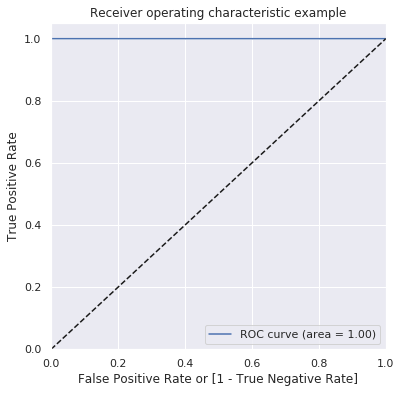

In [78]:
draw_roc( y_t, y_p )

In [79]:
Train_AUC=metrics.roc_auc_score(y_t,y_p)
print('Train auc =', metrics.roc_auc_score(y_t,y_p))
fpr, tpr, thresholds = metrics.roc_curve(y_t,y_p)
threshold = thresholds[np.argmax(tpr-fpr)]
print('Best Threshold=%f'%threshold)

train_threshold=threshold

Train auc = 1.0
Best Threshold=0.970516


### Evaluation on Test Set

In [80]:
%%time
y_pred_tst_xgb_lst = xgb_clf.predict_proba(X_tst)
y_pred_tst_xgb=[x[1] for x in y_pred_tst_xgb_lst]

CPU times: user 2.19 s, sys: 24.1 ms, total: 2.22 s
Wall time: 576 ms


### ROC Curve

In [81]:
#declaring
y_t=y_tst
y_p=y_pred_tst_xgb

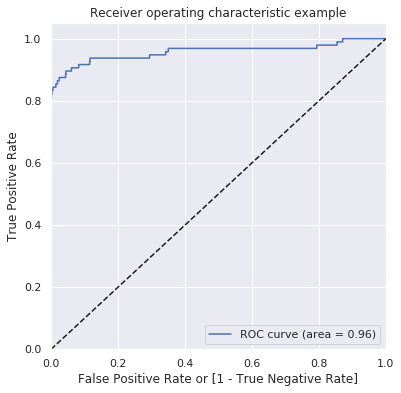

In [82]:
draw_roc( y_t, y_p )

In [83]:
from sklearn.metrics import roc_curve
from numpy import argmax

Test_AUC=metrics.roc_auc_score(y_t,y_p)
print('Test auc =', metrics.roc_auc_score(y_t,y_p))

Test auc = 0.9579224624555973


In [84]:

#creating new dataframe with predections and actual values
CFM_final = pd.DataFrame({'Actual':y_test, 'Predict_Prob':y_p})
CFM_final['Predict_Prob'] = y_p
CFM_final['Amount']=X_test['Amount']
CFM_final['Amount_Cost_Coeff']=0
CFM_final['Call_Cost_Coeff']=0


prob_i=round(train_threshold,4)
print('Thresold:-',prob_i)

CFM_final['Predicted'] = CFM_final.Predict_Prob.map(lambda x: 1 if x > prob_i else 0)
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=-1
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=1

CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=-10
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=-10

CFM_final['Amount_cal']=CFM_final['Amount_Cost_Coeff']*CFM_final['Amount']

Amount_ontransac=sum(list(CFM_final['Amount_cal']))
Amount_oncalls=sum(list(CFM_final['Call_Cost_Coeff']))
Total_amount_saved=(Amount_ontransac+Amount_oncalls)

#print(Amount_ontransac)
#print(Amount_oncalls)
print(Total_amount_saved)
CFM_final.head()

Thresold:- 0.9705
6438.769999999998


,Actual,Predict_Prob,Amount,Amount_Cost_Coeff,Call_Cost_Coeff,Predicted,Amount_cal
49089,0,1.477308e-05,1.99,0,0,0,0.0
154704,0,4.669908e-07,6.99,0,0,0,0.0
67247,0,1.205243e-06,306.16,0,0,0,0.0
251657,0,6.859546e-09,0.99,0,0,0,0.0
201903,0,2.334977e-03,30.27,0,0,0,0.0


In [85]:
#metrics
confusion_rfelog=metrics.confusion_matrix(CFM_final.Actual, CFM_final.Predicted )
TP = confusion_rfelog[1,1] # true positive 
TN = confusion_rfelog[0,0] # true negatives
FP = confusion_rfelog[0,1] # false positives
FN = confusion_rfelog[1,0] # false negatives

print('TP:',TP)
print('TN:',TN)
print('FP:',FP)
print('FN:',FN)

TP: 74
TN: 56859
FP: 7
FN: 22


### Classification Report

In [86]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

print(confusion_matrix(CFM_final.Actual, CFM_final.Predicted))
print('\n')

print(classification_report(CFM_final.Actual, CFM_final.Predicted))

[[56859     7]
 [   22    74]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.91      0.77      0.84        96

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



### Summary

In [87]:
#template
Model_Name='XGBoost'
Thresold=round(train_threshold,4)
Train_ROC_score=round(Train_AUC,4)
Test_ROC_score=round(Test_AUC,4)
Total_Savings=round(Total_amount_saved,2)

TP=TP
FP=FP
TN=TN
FN=FN


df_Model_Summary=add_new_row(Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,
                             TP,FP,TN,FN,df_Model_Summary)
df_Model_Summary

,Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,TP,FP,TN,FN
0,Random Forest,0.3772,0.9991,0.9803,988.59,79,677,56189,17
1,XGBoost,0.9705,1.0,0.9579,6438.77,74,7,56859,22


In [88]:
df_Model_Summary

,Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,TP,FP,TN,FN
0,Random Forest,0.3772,0.9991,0.9803,988.59,79,677,56189,17
1,XGBoost,0.9705,1.0,0.9579,6438.77,74,7,56859,22


## Logistic Model

In [89]:
import statsmodels.api as sm

In [90]:
#storing column names

X_trn=X_DS3_train
y_trn=y_DS3_train

X_tst=X_test_skew_df
y_tst=y_test

cols_model=X_trn.columns

In [92]:
#model
logm1=sm.GLM(y_trn,(sm.add_constant(X_trn[cols_model])),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               454898
Model:                            GLM   Df Residuals:                   454868
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 30 Mar 2020   Deviance:                          nan
Time:                        07:50:36   Pearson chi2:                 7.92e+16
No. Iterations:                   100   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6850      0.015   -238.109      0.000      -3.715      -3.655
V1             0.4315      0.014     30.930      0.000       0.404       0.459
V2            -0.3417      0.013    -26.391      0.000      -0.367      -0.316
V3            -0.1734      0.010    -17.334      0.000      -0.193      -0.154
V4             1.5882      0.012    129.349      0.000       1.564       1.612
V5             0.1207      0.010     12.284      0.000       0.101       0.140
V6            -0.1146      0.010    -11.401      0.000      -0.134      -0.095
V7            -0.0457      0.010     -4.632      0.000      -0.065      -0.026
V8            -0.7359      0.012    -59.741      0.000      -0.760      -0.712
V9            -0.4707      0.014    -33.194      0.000      -0.498      -0.443
V10           -1.1750      0.021    -56.953      0.000      -1.215      -1.135
V11            0.8216      0.012     68.735      0.000       0.798       0.845
V12           -1.3758      0.017    -82.770      0.000      -1.408      -1.343
V13           -0.2750      0.008    -35.575      0.000      -0.290      -0.260
V14           -1.2634      0.015    -84.391      0.000      -1.293      -1.234
V15           -0.0529      0.008     -6.579      0.000      -0.069      -0.037
V16           -0.5542      0.013    -42.939      0.000      -0.579      -0.529
V17           -0.6040      0.016    -38.315      0.000      -0.635      -0.573
V18           -0.2310      0.011    -21.899      0.000      -0.252      -0.210
V19            0.0608      0.008      7.506      0.000       0.045       0.077
V20           -0.0091      0.010     -0.933      0.351      -0.028       0.010
V21            0.1434      0.009     15.340      0.000       0.125       0.162
V22            0.1565      0.009     17.361      0.000       0.139       0.174
V23           -0.0007      0.007     -0.097      0.922      -0.015       0.013
V24           -0.1076      0.009    -11.427      0.000      -0.126      -0.089
V25           -0.0299      0.009     -3.398      0.001      -0.047      -0.013
V26           -0.3582      0.010    -36.984      0.000      -0.377      -0.339
V27            0.1354      0.012     11.752      0.000       0.113       0.158
V28            0.1015      0.009     11.789      0.000       0.085       0.118
Amount         0.1313      0.010     13.148      0.000       0.112       0.151
==============================================================================
"""

In [93]:
#removing columns based on p-value
remove_columns=['V20','V23']
cols_model=list(cols_model)
for x in remove_columns:
    cols_model.remove(x)

In [95]:
#model
logm2=sm.GLM(y_trn,(sm.add_constant(X_trn[cols_model])),family=sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               454898
Model:                            GLM   Df Residuals:                   454870
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 30 Mar 2020   Deviance:                          nan
Time:                        07:53:43   Pearson chi2:                 7.92e+16
No. Iterations:                   100   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6843      0.015   -238.685      0.000      -3.715      -3.654
V1             0.4296      0.014     31.202      0.000       0.403       0.457
V2            -0.3376      0.012    -27.928      0.000      -0.361      -0.314
V3            -0.1745      0.010    -17.688      0.000      -0.194      -0.155
V4             1.5860      0.012    131.897      0.000       1.562       1.610
V5             0.1211      0.010     12.462      0.000       0.102       0.140
V6            -0.1149      0.010    -11.448      0.000      -0.135      -0.095
V7            -0.0443      0.010     -4.551      0.000      -0.063      -0.025
V8            -0.7370      0.012    -60.109      0.000      -0.761      -0.713
V9            -0.4650      0.013    -36.512      0.000      -0.490      -0.440
V10           -1.1672      0.019    -62.191      0.000      -1.204      -1.130
V11            0.8230      0.012     69.450      0.000       0.800       0.846
V12           -1.3766      0.017    -83.214      0.000      -1.409      -1.344
V13           -0.2754      0.008    -35.686      0.000      -0.291      -0.260
V14           -1.2663      0.015    -86.594      0.000      -1.295      -1.238
V15           -0.0531      0.008     -6.600      0.000      -0.069      -0.037
V16           -0.5544      0.013    -42.981      0.000      -0.580      -0.529
V17           -0.6053      0.016    -38.627      0.000      -0.636      -0.575
V18           -0.2320      0.010    -22.107      0.000      -0.253      -0.211
V19            0.0594      0.008      7.488      0.000       0.044       0.075
V21            0.1414      0.009     15.557      0.000       0.124       0.159
V22            0.1568      0.009     17.484      0.000       0.139       0.174
V24           -0.1076      0.009    -11.438      0.000      -0.126      -0.089
V25           -0.0280      0.009     -3.276      0.001      -0.045      -0.011
V26           -0.3579      0.010    -36.983      0.000      -0.377      -0.339
V27            0.1405      0.010     13.930      0.000       0.121       0.160
V28            0.1030      0.008     12.198      0.000       0.086       0.120
Amount         0.1307      0.010     13.118      0.000       0.111       0.150
==============================================================================
"""

### Hyperopt Tuning

In [96]:
%%time

#initiate
skfold=StratifiedKFold(n_splits=5,shuffle=False,random_state=100)



#defining
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
def hyperopt_train_test(params):
    clf=LogisticRegression(**params)
    crossvalscore=cross_val_score(clf,X_trn[cols_model],y_trn,n_jobs=-1,cv=skfold,
              scoring= 'roc_auc').mean()
    return(crossvalscore)

lr_space={
    'penalty': hp.choice('penalty', ["l1", "l2"]),
    'solver': hp.choice('solver', ['liblinear']),
    'C':hp.uniform('C', .0001, 1000)
}

lr_best=0

def f(params):
    global lr_best
    acc=hyperopt_train_test(params)
    acc= float("{0:.8f}".format(acc))
    if acc>lr_best:
        lr_best=acc
        print('new best:', lr_best, params)
    return {'loss': -acc, 'status': STATUS_OK}

lr_trials=Trials()
lr_best=fmin(f,lr_space,algo=tpe.suggest,max_evals=100,trials=lr_trials)
from hyperopt import space_eval

lr_best_params=space_eval(lr_space, lr_best)
print('Best:',space_eval(lr_space, lr_best))

new best:                                              
0.98984855                                             
{'C': 281.5312252650268, 'penalty': 'l2', 'solver': 'liblinear'}
new best:                                                                  
0.98984857                                                                 
{'C': 13.083156502789734, 'penalty': 'l2', 'solver': 'liblinear'}          
new best:                                                                  
0.9898486                                                                  
{'C': 5.54034935947989, 'penalty': 'l2', 'solver': 'liblinear'}            
new best:                                                                  
0.9898487                                                                 
{'C': 1.7852976714566466, 'penalty': 'l2', 'solver': 'liblinear'}         
new best:                                                                 
0.98984878                                                        

### Best Parameters

In [97]:
lr_best_params

{'C': 0.1669568958372394, 'penalty': 'l2', 'solver': 'liblinear'}

## CV

In [98]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

skfold=StratifiedKFold(n_splits=5,shuffle=False,random_state=100)

lr_clf=LogisticRegression(**lr_best_params)
crossvalscore=cross_val_score(lr_clf,X_trn[cols_model],y_trn,n_jobs=-1,cv=skfold,
          scoring= 'roc_auc')

CPU times: user 139 ms, sys: 52 ms, total: 191 ms
Wall time: 8.34 s


In [99]:
crossvalscore

array([0.98979642, 0.98972965, 0.98981801, 0.98989811, 0.99000595])

## Fit

In [100]:
lr_clf=LogisticRegression(**lr_best_params)

In [101]:
%%time
lr_clf.fit(X_trn[cols_model],y_trn)

CPU times: user 3.97 s, sys: 44 ms, total: 4.02 s
Wall time: 4.02 s


LogisticRegression(C=0.1669568958372394, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
%%time
y_pred_trn_lr_lst = lr_clf.predict_proba(X_trn[cols_model])
y_pred_trn_lr=[x[1] for x in y_pred_trn_lr_lst]

CPU times: user 332 ms, sys: 288 ms, total: 620 ms
Wall time: 239 ms


In [103]:
y_t=y_trn
y_p=y_pred_trn_lr

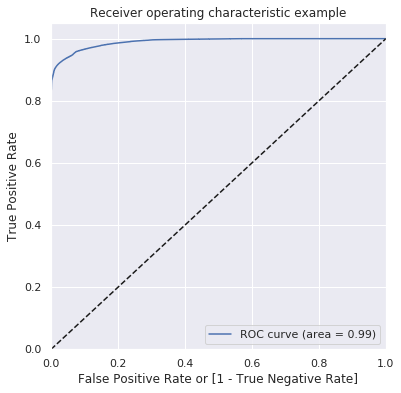

In [104]:
draw_roc( y_t, y_p )

In [105]:
Train_AUC=metrics.roc_auc_score(y_t,y_p)
print('Train auc =', metrics.roc_auc_score(y_t,y_p))
fpr, tpr, thresholds = metrics.roc_curve(y_t,y_p)
threshold = thresholds[np.argmax(tpr-fpr)]
print('Best Threshold=%f'%threshold)

train_threshold=threshold

Train auc = 0.98986123149857
Best Threshold=0.521888


### Evaluation on Test Set

In [106]:
%%time
y_pred_tst_lr_lst = lr_clf.predict_proba(X_tst[cols_model])
y_pred_tst_lr=[x[1] for x in y_pred_tst_lr_lst]

CPU times: user 69.7 ms, sys: 72.1 ms, total: 142 ms
Wall time: 40.1 ms


### ROC Curve

In [107]:
y_t=y_test
y_p=y_pred_tst_lr

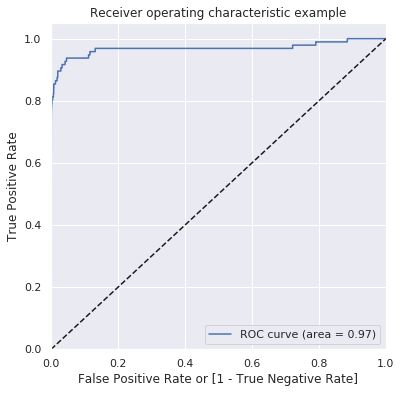

In [108]:
draw_roc( y_t, y_p )

In [109]:
from sklearn.metrics import roc_curve
from numpy import argmax

Test_AUC=metrics.roc_auc_score(y_t,y_p)
print('Test auc =', metrics.roc_auc_score(y_t,y_p))

Test auc = 0.9683684377894232


### Cost-Benfit Analysis

In [110]:

#creating new dataframe with predections and actual values
CFM_final = pd.DataFrame({'Actual':y_test, 'Predict_Prob':y_p})
CFM_final['Predict_Prob'] = y_p
CFM_final['Amount']=X_test['Amount']
CFM_final['Amount_Cost_Coeff']=0
CFM_final['Call_Cost_Coeff']=0


prob_i=round(train_threshold,4)
print('Thresold:-',prob_i)

CFM_final['Predicted'] = CFM_final.Predict_Prob.map(lambda x: 1 if x > prob_i else 0)
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=-1
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=1

CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=-10
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=-10

CFM_final['Amount_cal']=CFM_final['Amount_Cost_Coeff']*CFM_final['Amount']

Amount_ontransac=sum(list(CFM_final['Amount_cal']))
Amount_oncalls=sum(list(CFM_final['Call_Cost_Coeff']))
Total_amount_saved=(Amount_ontransac+Amount_oncalls)

#print(Amount_ontransac)
#print(Amount_oncalls)
print(Total_amount_saved)
CFM_final.head()

Thresold:- 0.5219
-3860.4100000000035


,Actual,Predict_Prob,Amount,Amount_Cost_Coeff,Call_Cost_Coeff,Predicted,Amount_cal
49089,0,0.016624,1.99,0,0,0,0.0
154704,0,0.151908,6.99,0,0,0,0.0
67247,0,0.025877,306.16,0,0,0,0.0
251657,0,0.019140,0.99,0,0,0,0.0
201903,0,0.950700,30.27,0,-10,1,0.0


In [111]:
#metrics
confusion_rfelog=metrics.confusion_matrix(CFM_final.Actual, CFM_final.Predicted )
TP = confusion_rfelog[1,1] # true positive 
TN = confusion_rfelog[0,0] # true negatives
FP = confusion_rfelog[0,1] # false positives
FN = confusion_rfelog[1,0] # false negatives

print('TP:',TP)
print('TN:',TN)
print('FP:',FP)
print('FN:',FN)

TP: 86
TN: 55534
FP: 1332
FN: 10


### Classification Report

In [112]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

print(confusion_matrix(CFM_final.Actual, CFM_final.Predicted))
print('\n')

print(classification_report(CFM_final.Actual, CFM_final.Predicted))

[[55534  1332]
 [   10    86]]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.90      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962



### Summary

In [113]:
#template
Model_Name='Logistic'
Thresold=round(train_threshold,4)
Train_ROC_score=round(Train_AUC,4)
Test_ROC_score=round(Test_AUC,4)
Total_Savings=round(Total_amount_saved,2)


TP=TP
FP=FP
TN=TN
FN=FN


df_Model_Summary=add_new_row(Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,
                             TP,FP,TN,FN,df_Model_Summary)
df_Model_Summary

,Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,TP,FP,TN,FN
0,Random Forest,0.3772,0.9991,0.9803,988.59,79,677,56189,17
1,XGBoost,0.9705,1.0,0.9579,6438.77,74,7,56859,22
2,Logistic,0.5219,0.9899,0.9684,-3860.41,86,1332,55534,10


## Ensemble

In [114]:
lst_1=y_pred_trn_rf
lst_2=y_pred_trn_xgb
lst_3=y_pred_trn_lr

zip_list = zip(lst_1,lst_2,lst_3) 
y_pred_trn_ensmbl = list(map(np.mean, zip_list))

In [115]:
y_t=y_trn
y_p=y_pred_trn_ensmbl

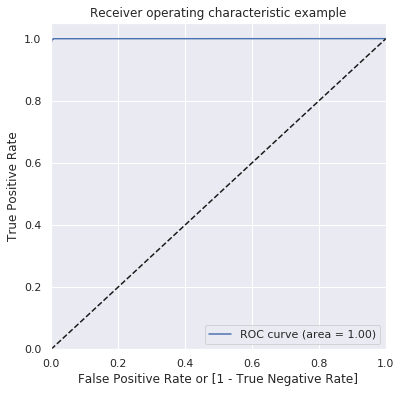

In [116]:
draw_roc( y_t, y_p )

In [117]:
Train_AUC=metrics.roc_auc_score(y_t,y_p)
print('Train auc =', metrics.roc_auc_score(y_t,y_p))
fpr, tpr, thresholds = metrics.roc_curve(y_t,y_p)
threshold = thresholds[np.argmax(tpr-fpr)]
print('Best Threshold=%f'%threshold)

train_threshold=threshold

Train auc = 0.9999522584863152
Best Threshold=0.436668


### Evaluation on Test Set

In [118]:
lst_1=y_pred_tst_rf
lst_2=y_pred_tst_xgb
lst_3=y_pred_tst_lr

zip_list = zip(lst_1,lst_2,lst_3) 
y_pred_tst_ensmbl = list(map(np.mean, zip_list))

In [119]:
y_t=y_test
y_p=y_pred_tst_ensmbl

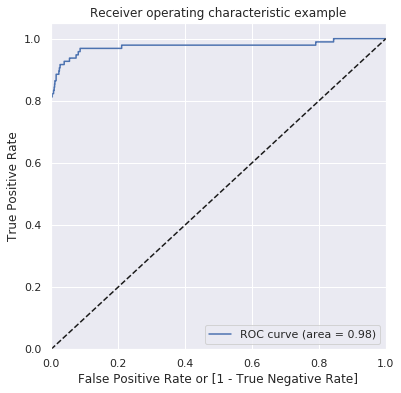

In [120]:
draw_roc( y_t, y_p )

In [121]:
from sklearn.metrics import roc_curve
from numpy import argmax

Test_AUC=metrics.roc_auc_score(y_t,y_p)
print('Test auc =', metrics.roc_auc_score(y_t,y_p))

Test auc = 0.9756840642914922


### Cost-Benfit Analysis

In [122]:

#creating new dataframe with predections and actual values
CFM_final = pd.DataFrame({'Actual':y_test, 'Predict_Prob':y_p})
CFM_final['Predict_Prob'] = y_p
CFM_final['Amount']=X_test['Amount']
CFM_final['Amount_Cost_Coeff']=0
CFM_final['Call_Cost_Coeff']=0


prob_i=round(train_threshold,4)
print('Thresold:-',prob_i)

CFM_final['Predicted'] = CFM_final.Predict_Prob.map(lambda x: 1 if x > prob_i else 0)
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=-1
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=0
CFM_final.Amount_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=1

CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==0)]=0
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==0) & (CFM_final.Predicted==1)]=-10
CFM_final.Call_Cost_Coeff[(CFM_final.Actual==1) & (CFM_final.Predicted==1)]=-10

CFM_final['Amount_cal']=CFM_final['Amount_Cost_Coeff']*CFM_final['Amount']

Amount_ontransac=sum(list(CFM_final['Amount_cal']))
Amount_oncalls=sum(list(CFM_final['Call_Cost_Coeff']))
Total_amount_saved=(Amount_ontransac+Amount_oncalls)

#print(Amount_ontransac)
#print(Amount_oncalls)
print(Total_amount_saved)
CFM_final.head()

Thresold:- 0.4367
4423.97


,Actual,Predict_Prob,Amount,Amount_Cost_Coeff,Call_Cost_Coeff,Predicted,Amount_cal
49089,0,0.011634,1.99,0,0,0,0.0
154704,0,0.065998,6.99,0,0,0,0.0
67247,0,0.011542,306.16,0,0,0,0.0
251657,0,0.010700,0.99,0,0,0,0.0
201903,0,0.469937,30.27,0,-10,1,0.0


In [123]:
#metrics
confusion_rfelog=metrics.confusion_matrix(CFM_final.Actual, CFM_final.Predicted )
TP = confusion_rfelog[1,1] # true positive 
TN = confusion_rfelog[0,0] # true negatives
FP = confusion_rfelog[0,1] # false positives
FN = confusion_rfelog[1,0] # false negatives

print('TP:',TP)
print('TN:',TN)
print('FP:',FP)
print('FN:',FN)

TP: 79
TN: 56658
FP: 208
FN: 17


### Classification Report

In [124]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

print(confusion_matrix(CFM_final.Actual, CFM_final.Predicted))
print('\n')

print(classification_report(CFM_final.Actual, CFM_final.Predicted))

[[56658   208]
 [   17    79]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.28      0.82      0.41        96

    accuracy                           1.00     56962
   macro avg       0.64      0.91      0.71     56962
weighted avg       1.00      1.00      1.00     56962



### Summary

In [125]:
#template
Model_Name='Ensemble_Mean'
Thresold=round(train_threshold,4)
Train_ROC_score=round(Train_AUC,4)
Test_ROC_score=round(Test_AUC,4)
Total_Savings=round(Total_amount_saved,2)

TP=TP
FP=FP
TN=TN
FN=FN


df_Model_Summary=add_new_row(Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,
                             TP,FP,TN,FN,df_Model_Summary)
df_Model_Summary

,Model_Name,Thresold,Train_ROC_score,Test_ROC_score,Total_Savings,TP,FP,TN,FN
0,Random Forest,0.3772,0.9991,0.9803,988.59,79,677,56189,17
1,XGBoost,0.9705,1.0,0.9579,6438.77,74,7,56859,22
2,Logistic,0.5219,0.9899,0.9684,-3860.41,86,1332,55534,10
3,Ensemble_Mean,0.4367,1.0,0.9757,4423.97,79,208,56658,17


In [126]:
#df_Model_Summary.to_csv('df_Model_Summary_smote',index=False)

### Print the important features of the best model to understand the dataset

In [127]:
xgb_clf.feature_importances_

array([0.01330643, 0.01137729, 0.01717907, 0.02748815, 0.00974611,
       0.00421366, 0.01512861, 0.01951993, 0.01405221, 0.41823602,
       0.06027498, 0.04248128, 0.01221241, 0.20134167, 0.00741936,
       0.01781355, 0.00963425, 0.01597443, 0.00686258, 0.00774556,
       0.00851766, 0.00976394, 0.0073992 , 0.00387604, 0.0053055 ,
       0.00904437, 0.0079906 , 0.00606184, 0.01003334], dtype=float32)

Top var = 10
2nd Top var = 14
3rd Top var = 11


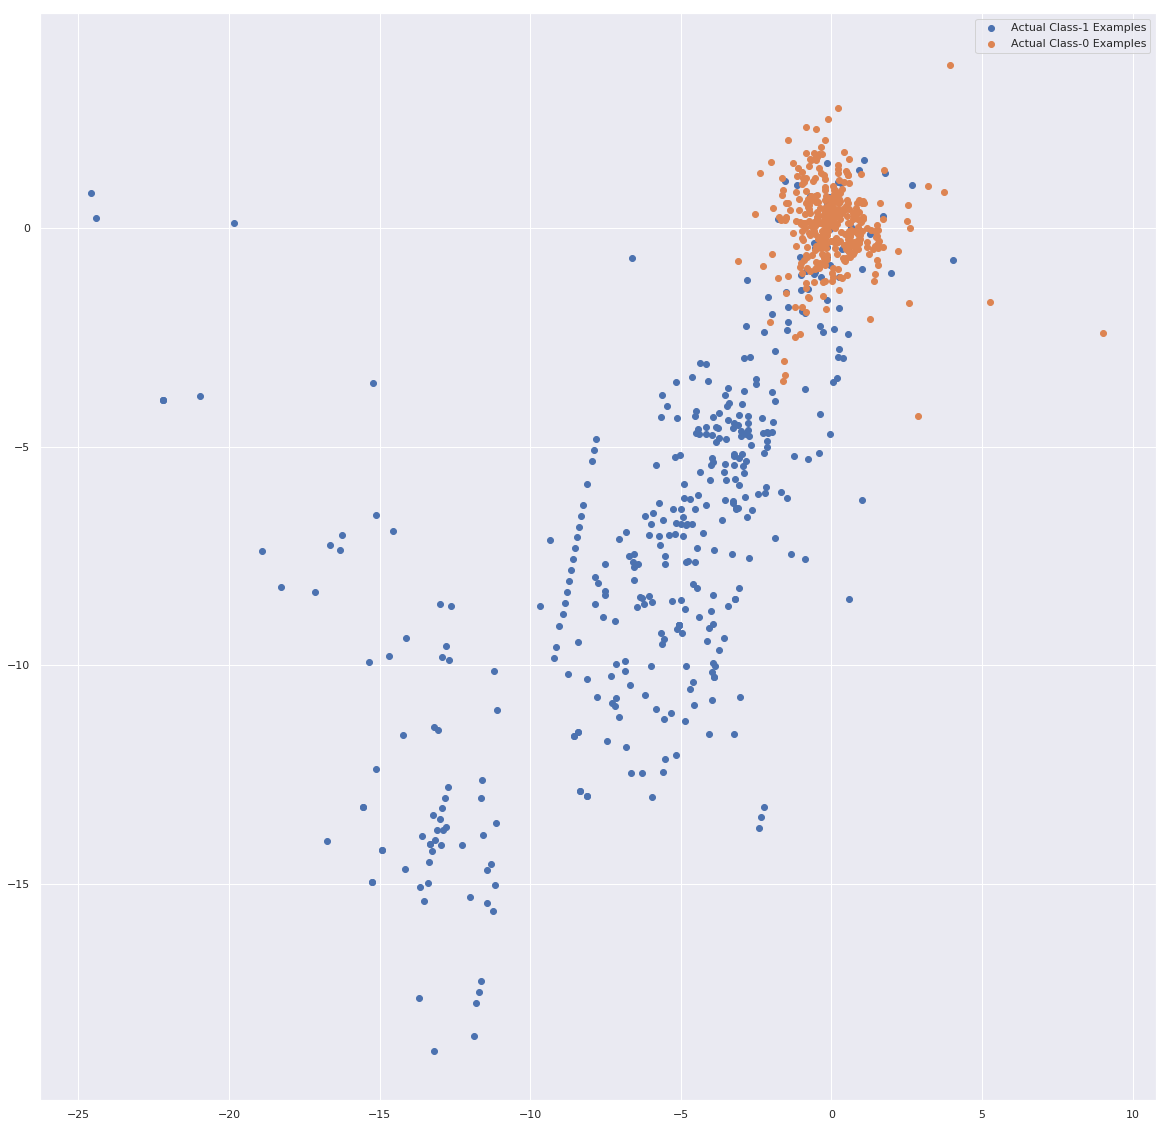

In [128]:
clf=xgb_clf

var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-17 and Index-12 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.values[np.where(y_train==1.0)]
X_train_0 = X_train.values[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [129]:
rf_clf.feature_importances_

array([0.00697821, 0.00517445, 0.01456588, 0.04429012, 0.00383501,
       0.00211893, 0.00697164, 0.00874658, 0.00575014, 0.23078669,
       0.02323512, 0.11846675, 0.00747308, 0.39557463, 0.00566512,
       0.00401798, 0.07828167, 0.00569403, 0.00367328, 0.00302811,
       0.00197085, 0.00230475, 0.00173939, 0.00088676, 0.00162872,
       0.00446781, 0.00283072, 0.00286101, 0.00698256])

Top var = 14
2nd Top var = 10
3rd Top var = 12


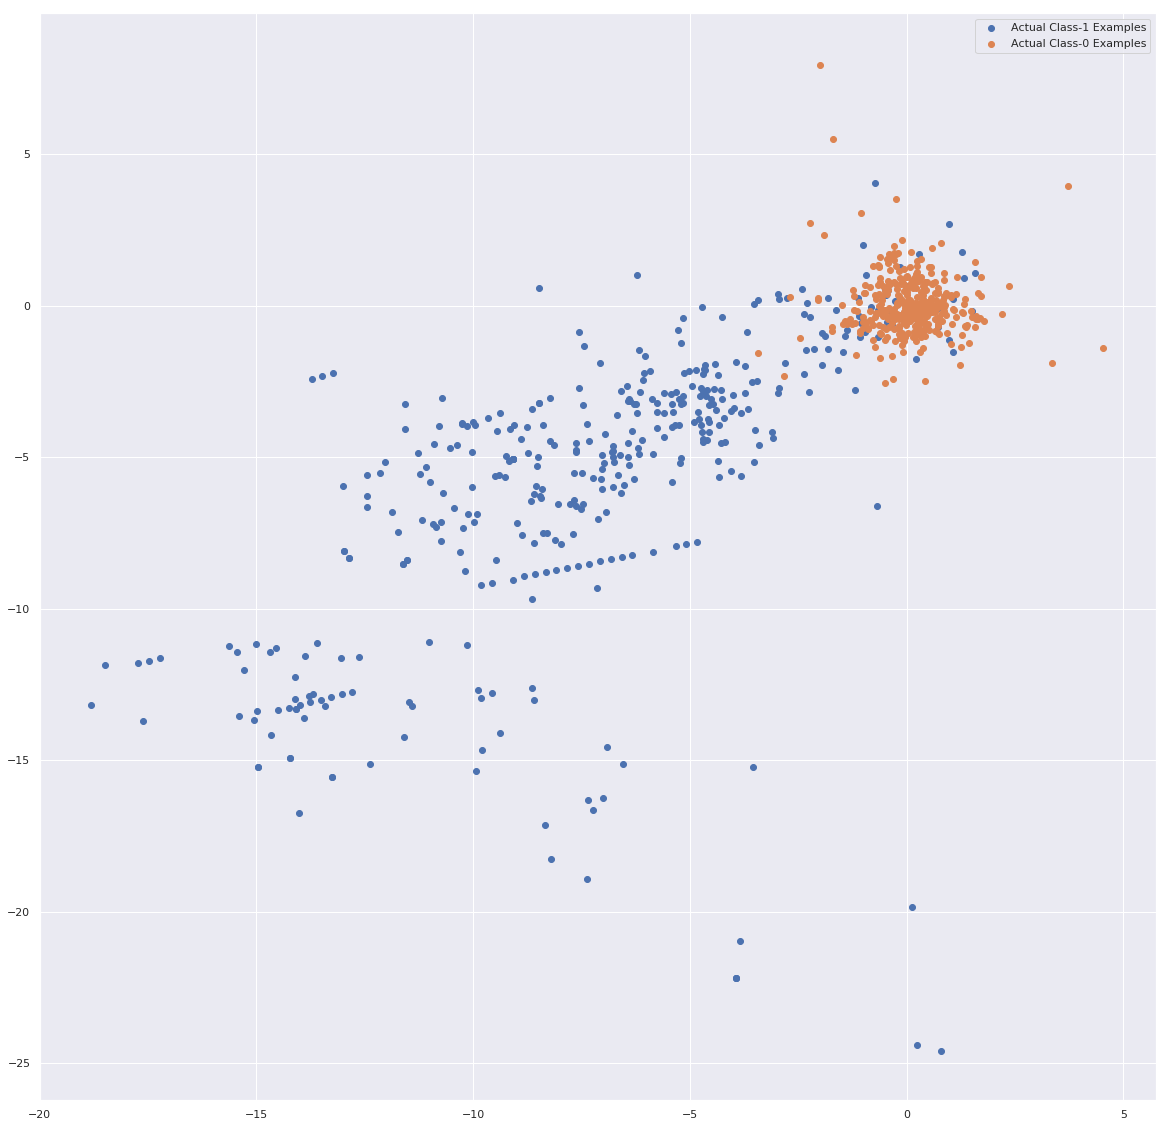

In [130]:
clf=rf_clf

var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-17 and Index-12 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.values[np.where(y_train==1.0)]
X_train_0 = X_train.values[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [131]:
lr_clf.coef_

array([[ 0.42199296, -0.3326611 , -0.17612534,  1.57766787,  0.12014458,
        -0.11504797, -0.04218951, -0.72931857, -0.45933149, -1.15419537,
         0.81559103, -1.36464047, -0.27503717, -1.25595405, -0.05225831,
        -0.54722756, -0.59415052, -0.22760272,  0.05749461,  0.13982321,
         0.15601978, -0.10716161, -0.02630752, -0.35643484,  0.13886278,
         0.10171351,  0.1312228 ]])

In [132]:
np.array(lr_clf.coef_[0])

array([ 0.42199296, -0.3326611 , -0.17612534,  1.57766787,  0.12014458,
       -0.11504797, -0.04218951, -0.72931857, -0.45933149, -1.15419537,
        0.81559103, -1.36464047, -0.27503717, -1.25595405, -0.05225831,
       -0.54722756, -0.59415052, -0.22760272,  0.05749461,  0.13982321,
        0.15601978, -0.10716161, -0.02630752, -0.35643484,  0.13886278,
        0.10171351,  0.1312228 ])

Top var = 4
2nd Top var = 11
3rd Top var = 1


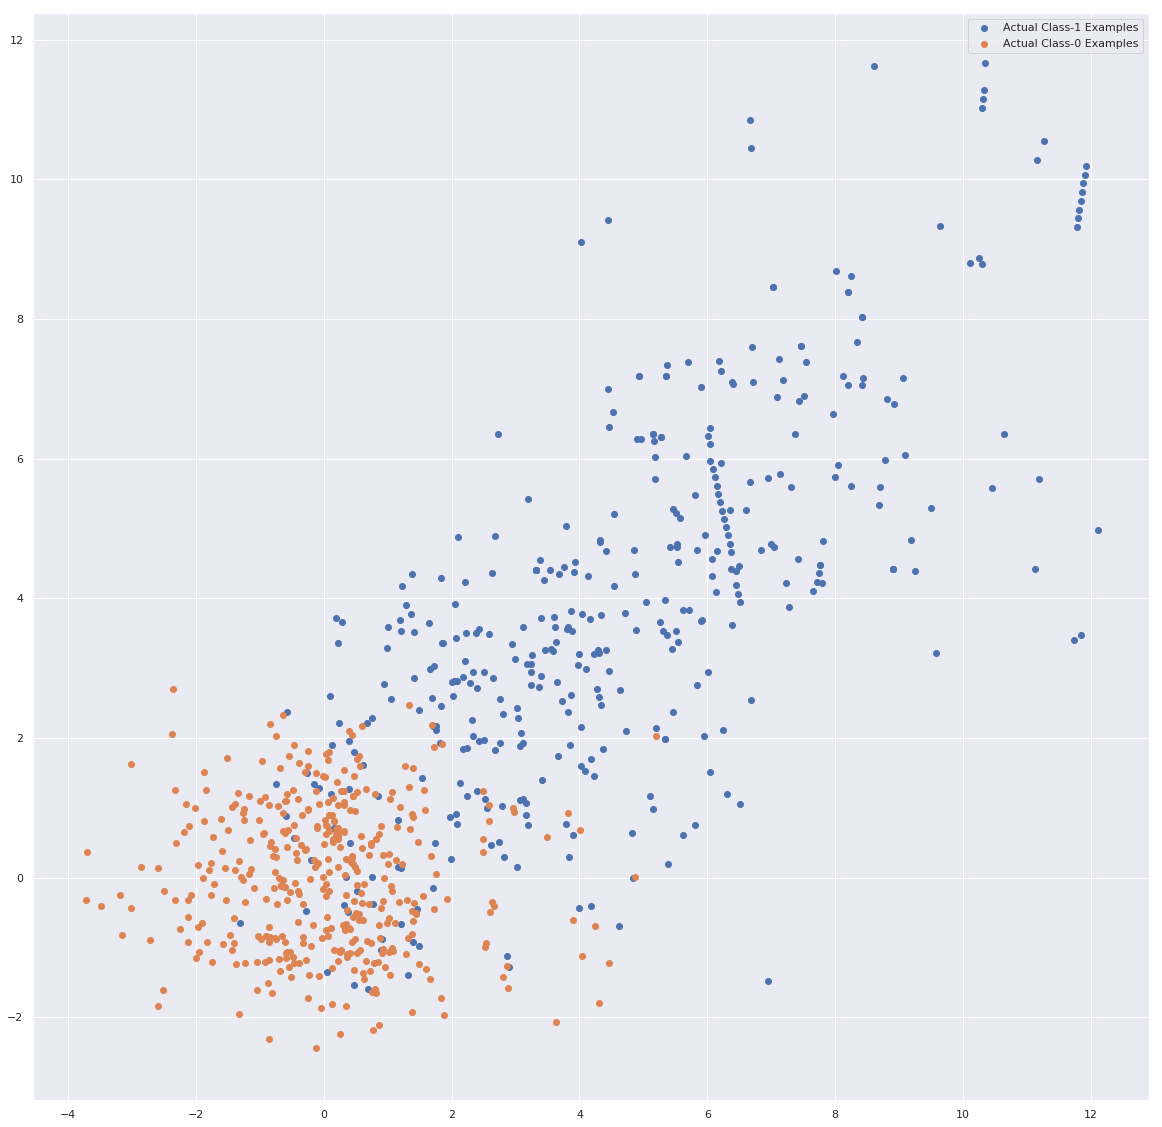

In [133]:
clf=rf_clf

lr_coeff=np.array(lr_clf.coef_[0])

var_imp = []
for i in lr_coeff:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(lr_coeff)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(lr_coeff)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(lr_coeff)[-3])+1)

# Variable on Index-17 and Index-12 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(lr_coeff)[-1])
second_top_var_index = var_imp.index(np.sort(lr_coeff)[-2])

X_train_1 = X_train.values[np.where(y_train==1.0)]
X_train_0 = X_train.values[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
y_t=y_test
y_p=y_pred0_xgb
print('Train auc =', metrics.roc_auc_score(y_test,y_p))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_p)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

In [ ]:
%%time


X_=X_DS0_train
y_=y_DS0_train

X_tst=X_test_skew_df
y_tst=y_test

#initiate
skfold_5=StratifiedKFold(n_splits=5,shuffle=False,random_state=10)
skfold_5_lst=list(skfold_5.split(X_,y_))

def auto_tuning(lst_num,skfold_5_lst):
    
    i=lst_num
    
    skfold5_lst=skfold_5_lst

    X_trn=X_.loc[skfold5_lst[i][1]][cols_model]
    y_trn=y_.loc[skfold5_lst[i][1]]
    
    skfold=StratifiedKFold(n_splits=3,shuffle=True,random_state=100)

    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import cross_val_score
    def hyperopt_train_test(params):
        clf=LogisticRegression(**params)
        crossvalscore=cross_val_score(clf,X_trn,y_trn,n_jobs=-1,cv=skfold,
                  scoring= 'roc_auc').mean()
        return(crossvalscore)

    lr_space={
        'penalty': hp.choice('penalty', ["l1", "l2"]),
        'solver': hp.choice('solver', ['liblinear']),
        'C':hp.uniform('C', .0001, 10000)
    }
    
    lr_best=0

    def f(params):
        global lr_best
        acc=hyperopt_train_test(params)
        acc= float("{0:.8f}".format(acc))
        if acc>lr_best:
            lr_best=acc
            print('new best:', lr_best, params)
        return {'loss': -acc, 'status': STATUS_OK}
    
    
    
    lr_trials=Trials()
    lr_best=fmin(f,lr_space,algo=tpe.suggest,max_evals=50,trials=lr_trials)
    
    from hyperopt import space_eval
    print('Best:',space_eval(lr_space, lr_best))
    
    
    return(space_eval(lr_space, lr_best))



In [ ]:
from multiprocessing import Pool


def print_range(lrange):
    print('First is {} and last is {}'.format(lrange[0], lrange[1]))


def run_in_parallel():
    ranges = [[0, 10], [10, 20], [20, 30]]
    pool = Pool(processes=len(ranges))
    pool.map(print_range, ranges)


if __name__ == '__main__':
    run_in_parallel()